In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# curve-fit() function imported from scipy
from scipy.optimize import curve_fit
import warnings

def Lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def Lorentz_triplet( x, center, split, height, width ):
    return Lorentzian( x, center - split, height, width ) + \
                    Lorentzian( x, center, height, width ) + \
                    Lorentzian( x, center + split, height, width )

def multi_Lorentz( x, height, width, center_1, split_1, center_2, split_2, slope, intercept):
    # height = parameters[ 0 ]
    # width = parameters[ 1 ]
    # center_1 = parameters[ 2 ]
    # split_1 = parameters[ 3 ]
    # center_2 = parameters[ 4 ]
    # split_2 = parameters[ 5 ]
    # slope = parameters[ 6 ]
    # intercept = parameters[ 7 ]
    return Lorentz_triplet( x, center_1, split_1, height, width) + \
            Lorentz_triplet( x, center_2, split_2, height, width) + \
            (x * slope + intercept)

# This is set up for reading a one-dimensional input of y-data with well-defined x-data
yData = np.loadtxt('/Users/millerj/delete_me/SW_Shiva_152.txt', unpack=True ) # read in 
yData = yData - min(yData)  # remove any vertical offset
yData = yData / max(yData)  # normalize

# numpy.linspace with the given arguments
# produce an array of num_points numbers between
# first_point and last_point, both inclusive
first_point = 100.061203
last_point = -106.0333844
num_points = 32768
xData = np.linspace(first_point, last_point, num_points)

# put fit parameters into an array
# Initial guesses from experimental spectrum
init_params = []
peak_height = 0.6
init_params.append( peak_height )
peak_width = 0.9
init_params.append( peak_width )
cluster_1_center = -24
init_params.append( cluster_1_center )
cluster_1_split = 2.5
init_params.append( cluster_1_split )
cluster_2_center = -27
init_params.append( cluster_2_center )
cluster_2_split = 2.5
init_params.append( cluster_2_split)
background_slope = 0
init_params.append( background_slope )
background_intercept = 0
init_params.append( background_intercept )
# print( init_params )

# Plot the experimental data
plt.plot(xData, yData, '.')

# this section of code tested making a triplet
triplet_1 = Lorentz_triplet(xData, cluster_1_center, cluster_1_split, peak_height, peak_width )
triplet_2 = Lorentz_triplet(xData, cluster_2_center, cluster_2_split, peak_height, peak_width )
# print("len(xData) ",len(xData))
# print("len(quick_triple) ",len(quick_triple))
# print( quick_triple )

plt.plot( xData, triplet_1 + ( background_slope * xData + background_intercept ) )
plt.plot( xData, triplet_2 + ( background_slope * xData + background_intercept ) )

start_fit = multi_Lorentz(xData, peak_height, peak_width, cluster_1_center, cluster_1_split, cluster_2_center, cluster_2_split, background_slope, background_intercept)
plt.plot(xData, start_fit, 'black' )
plt.xlim([10,-40])
plt.show()

OSError: /Users/millerj/delete_me/SW_Shiva_152.txt not found.

fit_center_1  -29.403538218252436      fit_split_1  2.0051902978927476
fit_center_2  -28.686575404032936      fit_split_2  1.9960320902272364


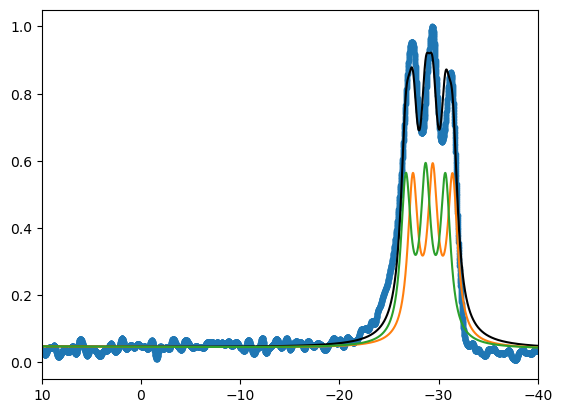

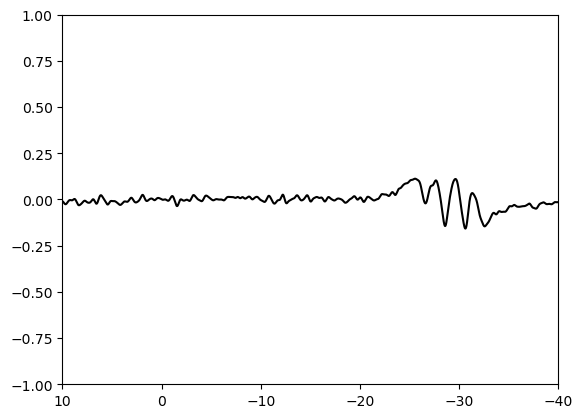

In [ ]:
# curve_fit() function takes the test-function
# x-data and y-data as argument and returns 
# the coefficients a and b in param and
# the estimated covariance of param in param_cov
# print( init_params )
# print( len( xData ), len( yData ), len( init_params ) )

end_params, param_cov = curve_fit( multi_Lorentz, xData, yData, init_params )

fit_height = end_params[ 0 ]
fit_width = end_params[ 1 ]
fit_center_1 = end_params[ 2 ]
fit_split_1 = end_params[ 3 ]
fit_center_2 = end_params[ 4 ]
fit_split_2 = end_params[ 5 ]
fit_slope = end_params[ 6 ]
fit_intercept = end_params[ 7 ]
print( "fit_center_1 ", fit_center_1, "    ", "fit_split_1 ", fit_split_1 )
print( "fit_center_2 ", fit_center_2, "    ", "fit_split_2 ", fit_split_2 )

end_fit = multi_Lorentz(xData, fit_height, fit_width, fit_center_1, fit_split_1, fit_center_2, fit_split_2, fit_slope, fit_intercept )
fit_triplet_1 = Lorentz_triplet(xData, fit_center_1, fit_split_1, fit_height, fit_width ) + (fit_slope * xData + fit_intercept )
fit_triplet_2 = Lorentz_triplet(xData, fit_center_2, fit_split_2, fit_height, fit_width ) + (fit_slope * xData + fit_intercept )

plt.plot( xData, yData, '.' )
plt.plot( xData, end_fit, 'black')
plt.plot( xData, fit_triplet_1 )
plt.plot( xData, fit_triplet_2 )
plt.xlim( [ 10, -40 ] )
plt.show()

residuals = yData - end_fit
plt.plot( xData, residuals, 'black' )
plt.xlim( [ 10, -40 ] )
plt.ylim( [ -1 , 1 ] )
plt.show()
